In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

### Demand Curve Generating with IV data 

In [221]:
# data = pd.read_csv("OCT_result_grp1_nondtds_5balance.csv")
data = pd.read_csv("OCT_result_grp3_nondtds_5balance.csv")
# data = pd.read_csv("OCT_result_grp0_5balance_new.csv")

In [83]:
data.columns

Index(['site_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_id',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff', 'booking_bool',
       'visitor_location_country_id', 

In [2]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) 
def expv2(x,a,b,c):
    return (a/x)+b
def poly(x,a,b,c):
    return a*(x**2) + b*x + c

In [222]:
# data_true = pd.read_csv('data_OCT_grp1.csv').drop(columns=['Unnamed: 0'])
data_true = pd.read_csv('data_OCT_grp3.csv')

In [86]:
data_true.head(5)

,site_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,position,...,booking_bool,visitor_location_country_id,Hotel_Group,year,month,day_of_week,weekly_mult,monthly_mult,Intrinsic_value,booking_bool_predicted
0,32,0.0,0.0,14082,4,4.0,1,4.29,5.33,31,...,0,220,1,2013,Jul,1,0.970713,0.872866,181.493669,0
1,32,0.0,0.0,14082,4,4.0,1,4.29,5.33,31,...,0,220,1,2013,Jul,2,0.967189,0.872866,182.155017,0
2,32,0.0,0.0,14082,4,4.0,1,4.29,5.33,31,...,0,220,1,2013,Jul,3,1.052249,0.872866,167.430179,0
3,32,0.0,0.0,21018,4,4.0,1,3.43,5.49,27,...,0,220,1,2013,Jul,1,0.970713,0.872866,114.823248,0
4,32,0.0,0.0,21018,4,4.0,1,3.43,5.49,27,...,0,220,1,2013,Jul,2,0.967189,0.872866,115.241654,0


In [243]:
def demand_curve(data,data_true):
    demand_data = data[['booking_bool_predicted','price_usd']]
    demand_data = demand_data[demand_data.price_usd < 500]
    demand_data = demand_data[demand_data.price_usd > 10]
    booking_prob = demand_data[['booking_bool_predicted']].groupby(pd.cut(demand_data["price_usd"], np.arange(10, 500,1))).mean()
    booking_prob = booking_prob.dropna()
    booking_prob_v1 = booking_prob[booking_prob.booking_bool_predicted<0.08]
    booking_prob_v1 = booking_prob_v1[booking_prob_v1.booking_bool_predicted>0]
    price = pd.IntervalIndex(booking_prob_v1.index.get_level_values('price_usd')).mid
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,booking_prob_v1.booking_bool_predicted,price, p0=[1,-0.5, 1])
    fitted_value = exponential((booking_prob_v1.booking_bool_predicted).sort_values(),popt_exponential[0],popt_exponential[1],popt_exponential[2])
    r2 = R2((booking_prob_v1.booking_bool_predicted).sort_values(),price,fitted_value)
    print("R-squared of the ML Predicted Curve: ",r2)
    #True Demand Curve
    demand_data_true = data_true[['booking_bool','price_usd']]
    demand_data_true = demand_data_true[demand_data_true.price_usd < 500]
    demand_data_true = demand_data_true[demand_data_true.price_usd > 10]
    booking_prob_true = demand_data_true[['booking_bool']].groupby(pd.cut(demand_data_true["price_usd"], np.arange(10, 500, 5))).mean()
    booking_prob_true = booking_prob_true.dropna()
    booking_prob_v1_true = booking_prob_true[booking_prob_true.booking_bool<0.08]
    booking_prob_v1_true = booking_prob_v1_true[booking_prob_v1_true.booking_bool>0]
    price_true = pd.IntervalIndex(booking_prob_v1_true.index.get_level_values('price_usd')).mid
    popt_exponential_true, pcov_exponential_true = scipy.optimize.curve_fit(exponential,booking_prob_v1_true.booking_bool,price_true, p0=[1,-0.5, 1])
    fitted_value_true = exponential(booking_prob_v1_true.booking_bool.sort_values(),popt_exponential_true[0],popt_exponential_true[1],popt_exponential_true[2])
    r2_true = R2(booking_prob_v1_true.booking_bool.sort_values(),price_true,fitted_value_true)
    print("R-squared of the True Demand Curve: ",r2_true)
    #Plotting
    plt.scatter(booking_prob_v1_true,price_true,label = 'True Demand')
    plt.scatter(booking_prob_v1,price, label= 'ML Predicted')
    plt.plot(booking_prob_v1_true.booking_bool.sort_values(),fitted_value_true,"r--",label='True Demand Curve')
    plt.plot((booking_prob_v1.booking_bool_predicted).sort_values(),fitted_value,"k--",label = 'ML Predicted Demand Curve')
    plt.xlabel("Booking Probability")
    plt.ylabel("Intrinsic Value")
    plt.title('Demand Curve Comparison for Hotel Group 3')
    plt.legend()
    return popt_exponential[:-1],popt_exponential_true[:-1]

In [153]:
def R2(xdata,ydata,fitted_value):
    residuals = ydata- fitted_value
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

R-squared of the ML Predicted Curve:  0.22675206806023873
R-squared of the True Demand Curve:  0.5077033519835763


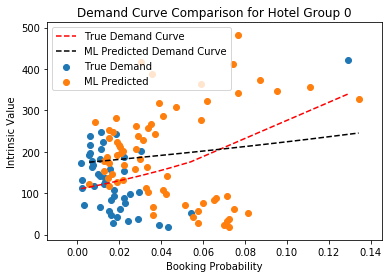

In [184]:
# grp0_ML_coef, grp0_true_coef = demand_curve(data,data_true)

R-squared of the ML Predicted Curve:  -1.3526248740783258
R-squared of the True Demand Curve:  -1.9791673195974866


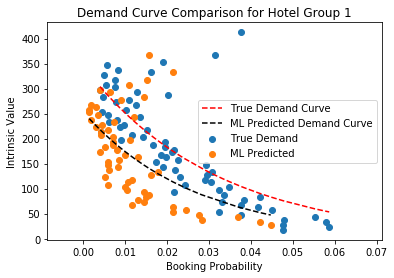

In [206]:
# grp1_ML_coef, grp1_true_coef = demand_curve(data,data_true)

R-squared of the ML Predicted Curve:  -0.38998578780197435
R-squared of the True Demand Curve:  -1.5163850614780752


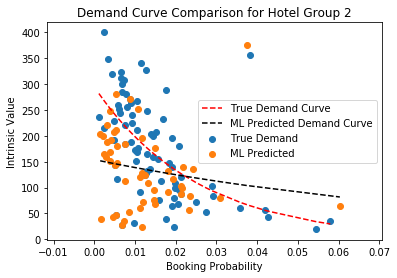

In [220]:
# grp2_ML_coef, grp2_true_coef = demand_curve(data,data_true)

R-squared of the ML Predicted Curve:  0.33970571161949303
R-squared of the True Demand Curve:  0.4367741867883358


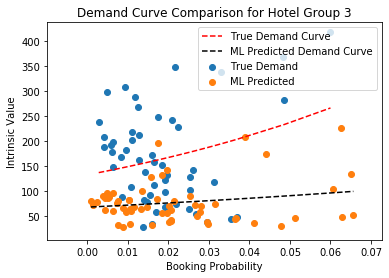

In [244]:
# grp3_ML_coef, grp3_true_coef = demand_curve(data,data_true)

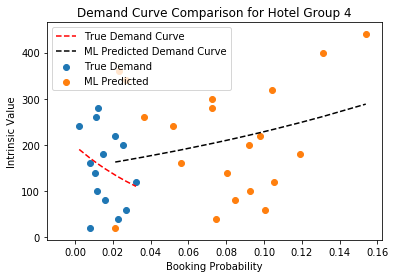

In [130]:
grp4_ML_coef, grp4_true_coef = demand_curve(data,data_true)

R-squared of the ML Predicted Curve:  -0.9223645975040049
R-squared of the True Demand Curve:  -1.6674790852159074


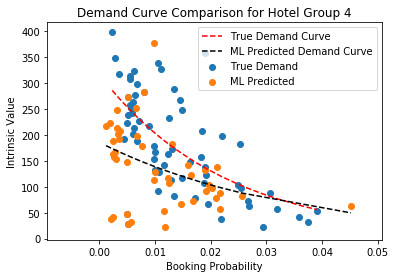

In [165]:
grp5_ML_coef, grp5_true_coef = demand_curve(data,data_true) #using group 4 in the title for the poster

In [131]:
grp0_ML_coef, grp0_true_coef

(array([305.27417277, -12.42761648]), array([233.41661873, -41.25055808]))

In [132]:
grp3_ML_coef, grp3_true_coef

(array([182.44087022, -33.85116882]), array([301.73547847, -27.51108341]))

In [133]:
grp5_ML_coef, grp5_true_coef

(array([190.07289677, -39.04852811]), array([161.44049996, -12.48533166]))

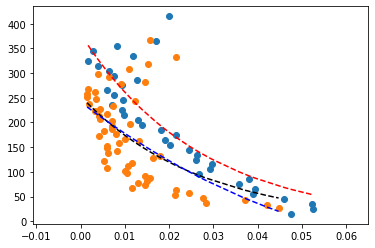

In [92]:
fitted_value_true = exponential(booking_prob_v1_true.booking_bool.sort_values(),popt_exponential_true[0],popt_exponential_true[1],popt_exponential_true[2])
plt.scatter(booking_prob_v1_true,price_true)
plt.scatter(booking_prob_v1,price)
# plt.plot(price,exponential(price,popt_exponential[0],popt_exponential[1],popt_exponential[2]),"r--")
plt.plot(booking_prob_v1_true.booking_bool.sort_values(),fitted_value_true,"r--")
plt.plot((booking_prob_v1.booking_bool_predicted).sort_values(),fitted_value,"k--")
plt.plot(booking_prob_v1.booking_bool_predicted.sort_values(),fitted_value_poly,"b--")

## New Clustering with 5 Groups

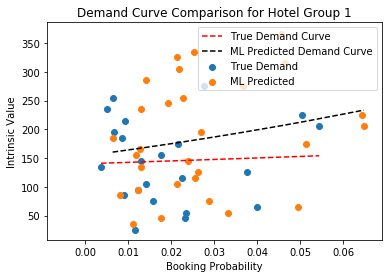

In [93]:
# grp1_ML_coef_new, grp1_true_coef_new = demand_curve(data,data_true)

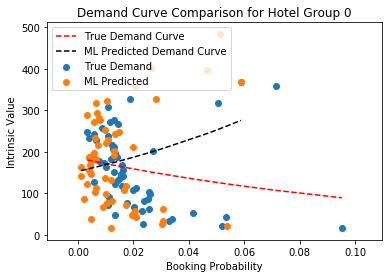

In [121]:
grp0_ML_coef_new, grp0_true_coef_new = demand_curve(data,data_true)